In [ ]:
# Load Kaggle API Token
from google.colab import files
!pip install -q kaggle > /dev/null
uploaded = files.upload()
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# Load Data
!kaggle competitions download -c tensorflow-speech-recognition-challenge > /dev/null

# Unzip Data
!apt-get install p7zip-full > /dev/null
!p7zip -d train.7z > /dev/null
# !p7zip -d test.7z > /dev/null


In [69]:
from scipy.io import wavfile
from IPython.display import Audio
from os import walk
from matplotlib import pyplot as plt

debug = False

train_audio_path = '/content/train/audio/'

# Load all filenames into a dictionary so we can call on them easily
files = {}
for (dirpath, dirnames, filenames) in walk(train_audio_path):
  files[dirpath[21:]] = filenames

if debug:
  # Look at a small part of the dictionary
  for label, samples in files.items():
    print(label, '\t', samples[0:5])

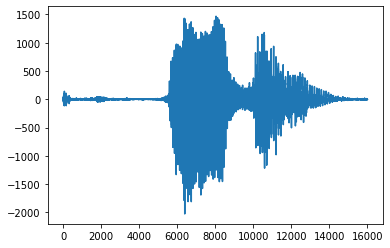

In [72]:
# Listen to and look at one audio sample of our choice
label = 'marvin'
sample_name = files[label][0]
sample_rate, sample = wavfile.read(train_audio_path + label + '/' + sample_name)

plt.plot(sample)
Audio(sample,rate=sample_rate)